
# This is an Un-named project
## Created by *@rohaanmd* and *@developer-bar*


You can click [here](https://medium.com/analytics-vidhya/sign-language-recognition-using-cnn-and-opencv-beginner-level-72091ca35a19) to see the orignal tutorial we are following for basics tutorial.

**But I am making some of my own tweaks**

## the goal is to give dumb and deaf people a platform where they can be able to communicate with others.

# About the Data

### Download the Dataset [here](https://www.kaggle.com/datamunge/sign-language-mnist?select=sign_mnist_train)


The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test = pd.read_csv('/content/drive/My Drive/handgesture/sign_mnist_test.csv')
train = pd.read_csv('/content/drive/My Drive/handgesture/sign_mnist_train.csv')
#uncomment the following  jupyternotebook
# test = pd.read_csv('./data/sign_mnist_test.csv')
# train = pd.read_csv('./data/sign_mnist_train.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


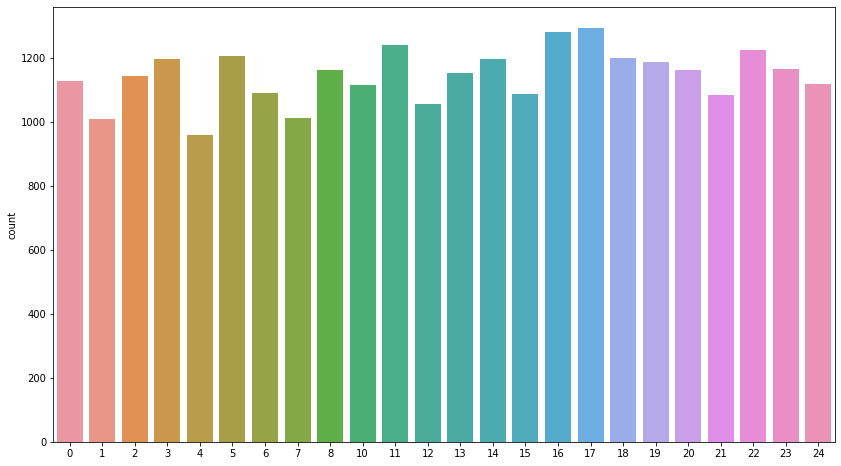

In [ ]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

In [ ]:
X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(7172, 784)

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()



Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         2

In [ ]:
#optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999)

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 50 
batch_size = 200

In [ ]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
109/109 [==============================] - 14s 126ms/step - loss: 3.1964 - accuracy: 0.0692 - val_loss: 2.8040 - val_accuracy: 0.1360
Epoch 2/50
109/109 [==============================] - 12s 113ms/step - loss: 2.6838 - accuracy: 0.1792 - val_loss: 1.9828 - val_accuracy: 0.3781
Epoch 3/50
109/109 [==============================] - 12s 111ms/step - loss: 2.0706 - accuracy: 0.3360 - val_loss: 1.0652 - val_accuracy: 0.6285
Epoch 4/50
109/109 [==============================] - 12s 114ms/step - loss: 1.5223 - accuracy: 0.5017 - val_loss: 0.6046 - val_accuracy: 0.8113
Epoch 5/50
109/109 [==============================] - 13s 116ms/step - loss: 1.1196 - accuracy: 0.6279 - val_loss: 0.4638 - val_accuracy: 0.8141
Epoch 6/50
109/109 [==============================] - 12s 112ms/step - loss: 0.8254 - accuracy: 0.7211 - val_loss: 0.2701 - val_accuracy: 0.8984
Epoch 7/50
109/109 [==============================] - 

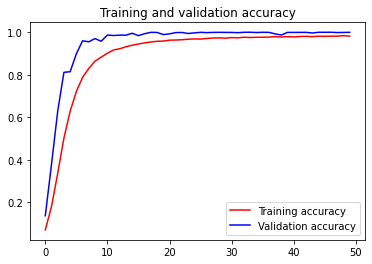

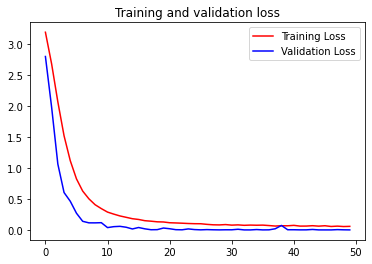

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

